# DAY 23 Project 3 
# Netflix Stock Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [8]:
df = pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


# Change Date Index

In [10]:
sns.set(rc = {"figure.figsize" :(10,5)})
df["Date"]= pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


# Volume of Stock traded

Text(0.5, 1.0, 'Volume of Stock vs Time')

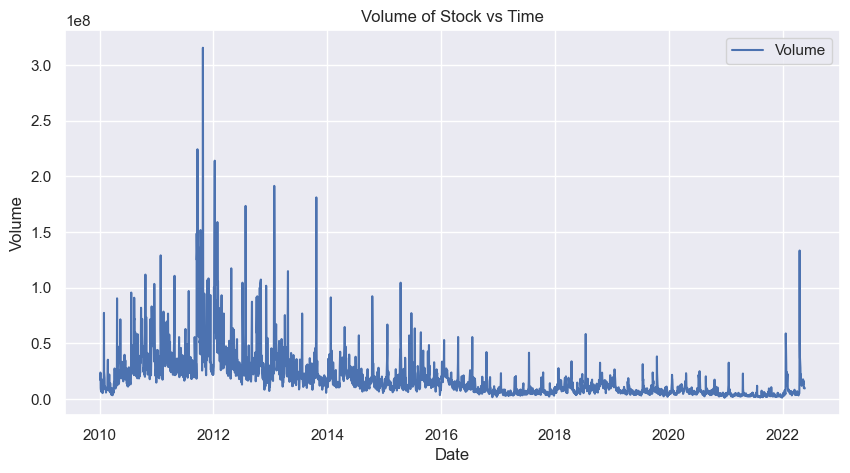

In [11]:
sns.lineplot(x = df.index , y = df["Volume"] , label = "Volume")
plt.title("Volume of Stock vs Time")

# Second Objective - Netflix Stock Price High , Open and Close

<AxesSubplot:title={'center':'Netflix Stock Price'}, xlabel='Date'>

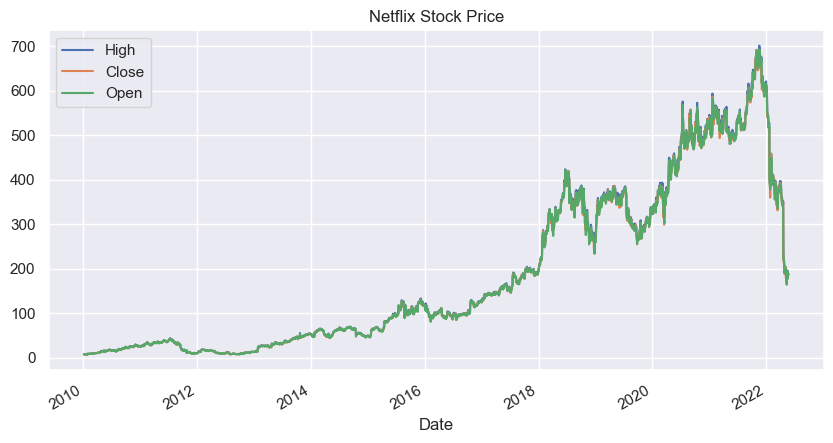

In [12]:
df.plot(y = ["High","Close","Open"],title = "Netflix Stock Price")

# Third Objective - Netflix Stock Price Day , Month and Yearwise

<AxesSubplot:xlabel='Year'>

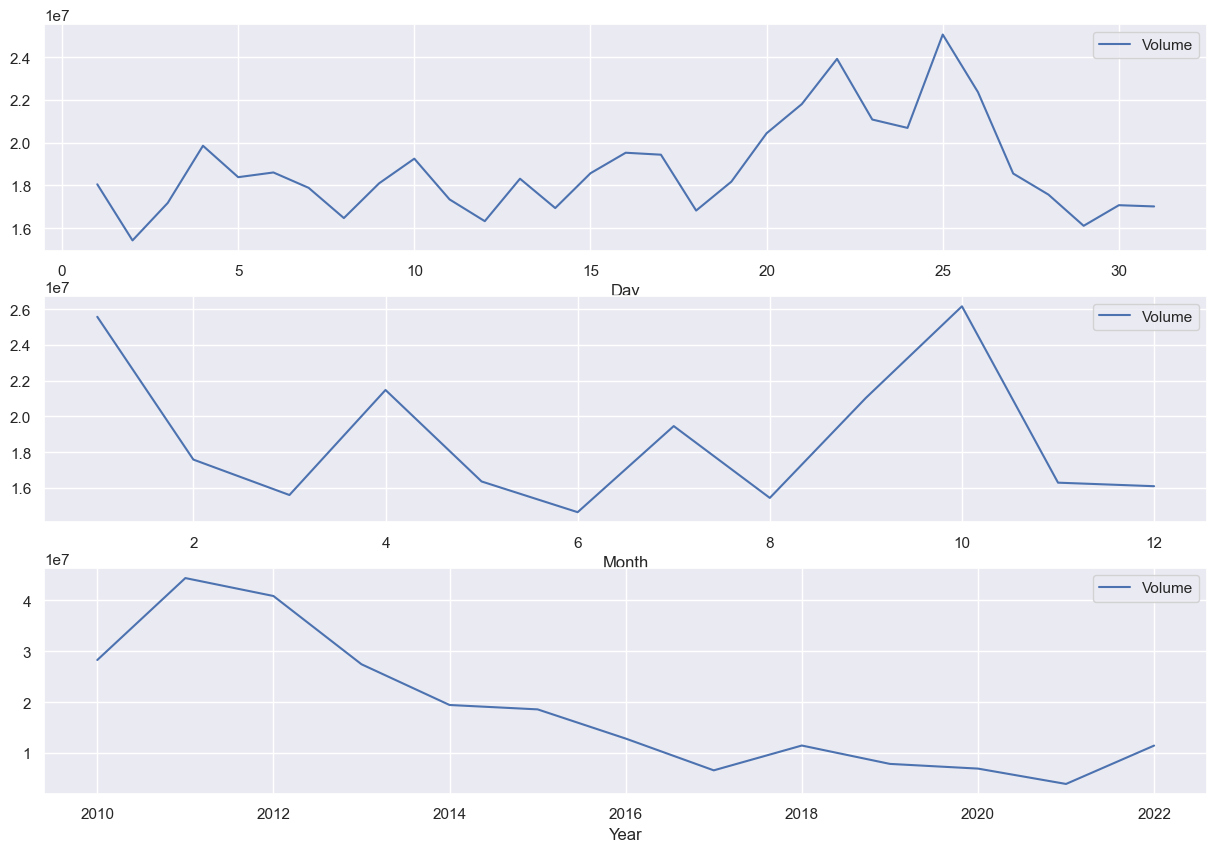

In [13]:


fig,(ax1 , ax2 ,ax3) = plt.subplots(3 , figsize = (15,10))
df.groupby(df.index.day).mean().plot( y = "Volume" , ax = ax1 , xlabel = "Day")
df.groupby(df.index.month).mean().plot( y = "Volume" , ax = ax2 , xlabel = "Month")
df.groupby(df.index.year).mean().plot( y = "Volume" , ax = ax3 , xlabel = "Year")






# Fourth Objective - Top 5 Dates with High Price

In [15]:
a = df.sort_values(by = "High" , ascending = False).head(5)
a

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-17,690.000000,700.989990,686.090027,691.690002,691.690002,2732800
2021-11-19,692.349976,694.159973,675.000000,678.799988,678.799988,2613700
2021-11-18,691.609985,691.739990,679.739990,682.020020,682.020020,2012900
2021-10-29,673.059998,690.969971,671.239990,690.309998,690.309998,3825300
2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900


# Fifth Objective - Top 5 Dates with Lowest Price

In [16]:
b = df.sort_values(by = "Low" , ascending = True ).head(5) 
b

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-25,7.292857,7.357143,6.931429,7.018571,7.018571,13791400
2010-01-26,6.960000,7.178571,6.937143,7.135714,7.135714,11343500
2010-01-27,7.142857,7.311429,6.992857,7.281429,7.281429,23347100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-21,7.217143,7.454286,7.214286,7.312857,7.312857,8614900


# Trend

<AxesSubplot:xlabel='Date', ylabel='Low'>

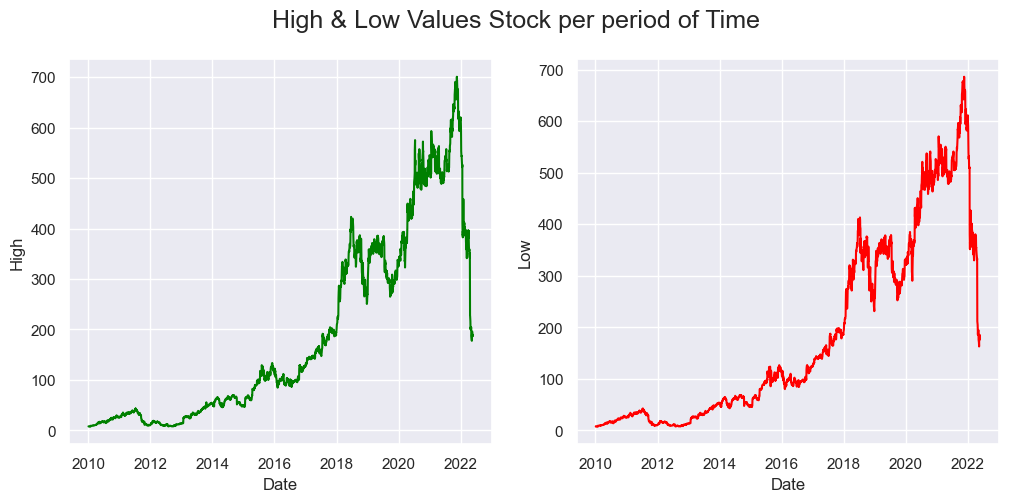

In [21]:
fig,axes = plt.subplots(nrows = 1 , ncols = 2 , sharex = True , figsize = (12,5))
fig.suptitle("High & Low Values Stock per period of Time " , fontsize = 18)
sns.lineplot(ax = axes[0] , y = df["High"], x = df.index , color = "green")
sns.lineplot(ax = axes[1] , y = df["Low"] , x = df.index , color = "red")